# Exploration

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from dotenv import find_dotenv
import house_climate

In [2]:
REPO_ROOT = Path(find_dotenv()).parent
POSTPROCESSED_PATH = REPO_ROOT / "data" / "interim" / "02_with_features.parquet"

___

## Load df from disk

In [3]:
postprocessed = pd.read_parquet(POSTPROCESSED_PATH)
postprocessed

,humidity,temperature,zone_id,value,weather,exterior_temp,zone_type,zone_name,hours_in_day,hour_of_day,day_of_week,day_of_year,day_night,is_weekend
timestamp,,,,,,,,,,,,,,
2021-12-31 23:45:00+00:00,0.500,20.00,1,NONE,UNKNOWN,NaN,HEATING,Living room,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,2,NONE,UNKNOWN,NaN,HEATING,Bedroom,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,6,NONE,UNKNOWN,NaN,HEATING,Haadiyah Room,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,7,NONE,UNKNOWN,NaN,HEATING,Ensuite,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,9,NONE,UNKNOWN,NaN,HEATING,Office,24.0,23,4,365,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02 00:15:00+00:00,0.557,19.87,9,HIGH,NIGHT_CLOUDY,0.4,HEATING,Upstairs bathroom,24.0,0,0,2,NaN,False
2023-01-02 00:15:00+00:00,0.585,20.06,10,NONE,NIGHT_CLOUDY,0.4,HEATING,Upstairs bathroom,24.0,0,0,2,NaN,False
2023-01-02 00:15:00+00:00,0.579,20.35,12,NONE,NIGHT_CLOUDY,0.4,HEATING,Upstairs bathroom,24.0,0,0,2,NaN,False


In [6]:
postprocessed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4190470 entries, 2021-12-31 23:45:00+00:00 to 2023-01-02 00:15:00+00:00
Data columns (total 14 columns):
 #   Column         Dtype   
---  ------         -----   
 0   humidity       float64 
 1   temperature    float64 
 2   zone_id        Int8    
 3   value          object  
 4   weather        object  
 5   exterior_temp  float64 
 6   zone_type      object  
 7   zone_name      object  
 8   hours_in_day   float64 
 9   hour_of_day    int64   
 10  day_of_week    int64   
 11  day_of_year    int64   
 12  day_night      category
 13  is_weekend     bool    
dtypes: Int8(1), bool(1), category(1), float64(4), int64(3), object(4)
memory usage: 431.9+ MB


___

## Visualisations

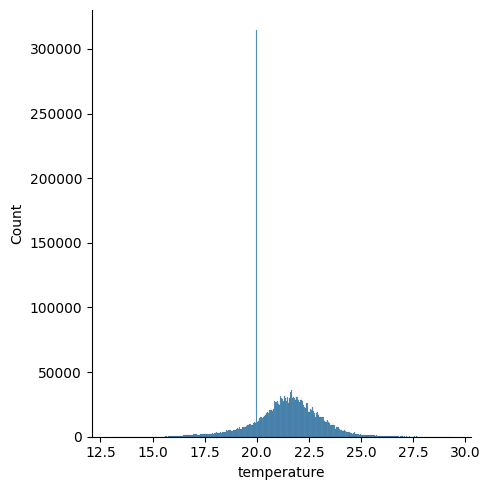

In [5]:
sns.displot(data=postprocessed, x='temperature')

<Axes: xlabel='temperature', ylabel='Density'>

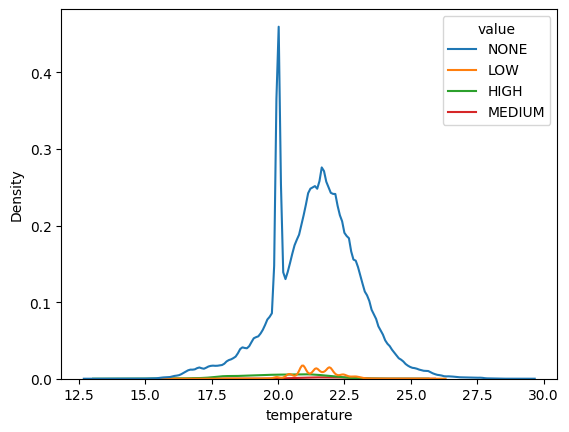

In [6]:
sns.kdeplot(data=postprocessed, x='temperature', hue='value', )

<Axes: xlabel='temperature', ylabel='Density'>

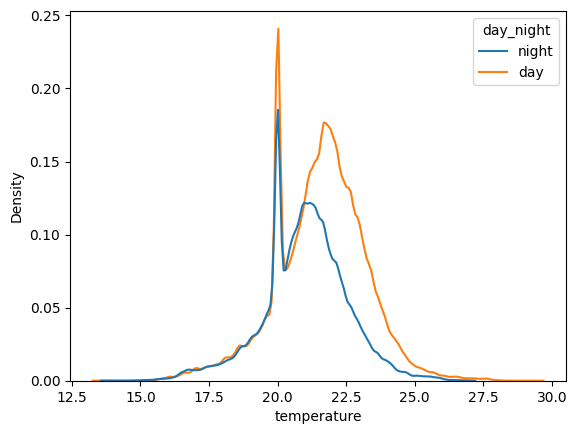

In [7]:
sns.kdeplot(data=postprocessed, x='temperature', hue='day_night', )

<Axes: xlabel='temperature', ylabel='Density'>

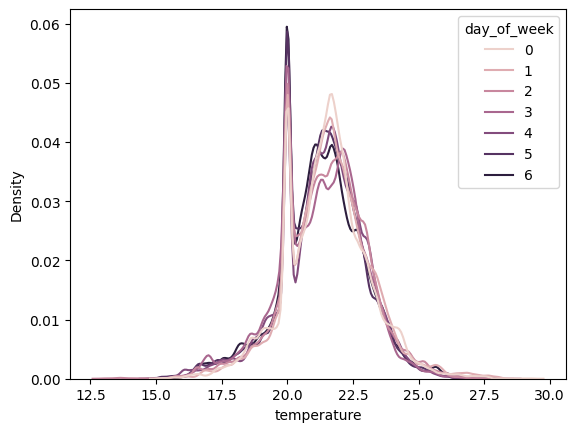

In [8]:
sns.kdeplot(data=postprocessed, x='temperature', hue='day_of_week')

<Axes: xlabel='temperature', ylabel='Density'>

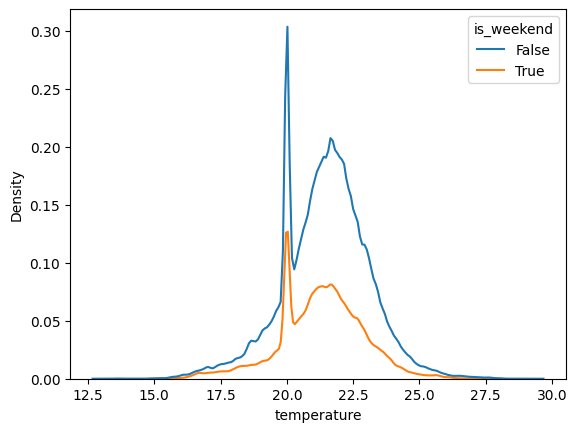

In [9]:
sns.kdeplot(data=postprocessed, x='temperature', hue='is_weekend')

<Axes: xlabel='temperature', ylabel='Density'>

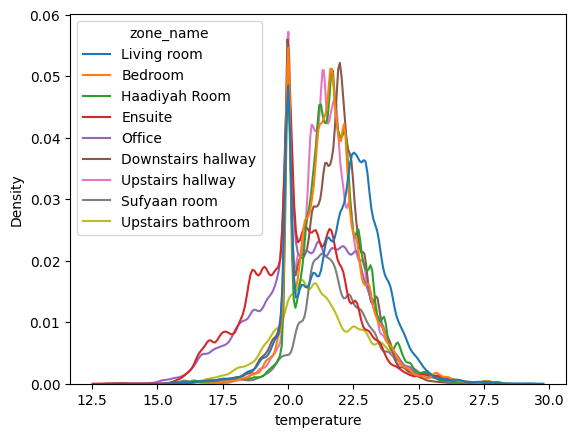

In [10]:
sns.kdeplot(data=postprocessed, x='temperature', hue='zone_name')

<Axes: xlabel='day_of_year', ylabel='temperature'>

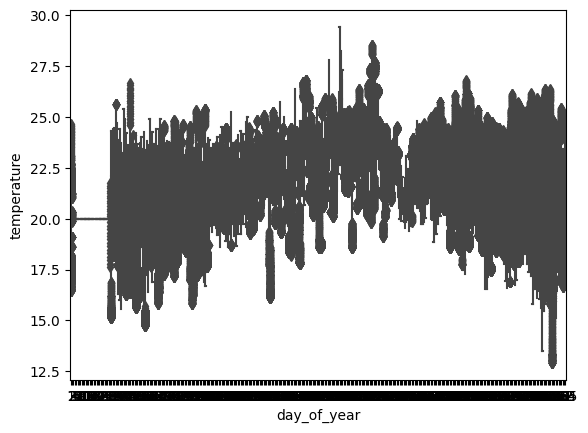

In [11]:
sns.boxplot(data=postprocessed, y='temperature', x='day_of_year')

<Axes: xlabel='day_of_week', ylabel='temperature'>

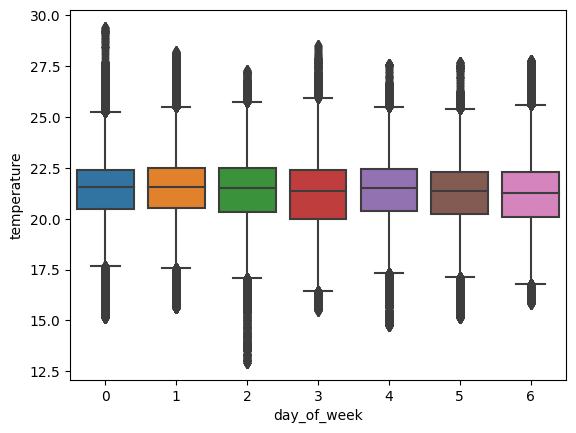

In [12]:
sns.boxplot(data=postprocessed, y='temperature', x='day_of_week')

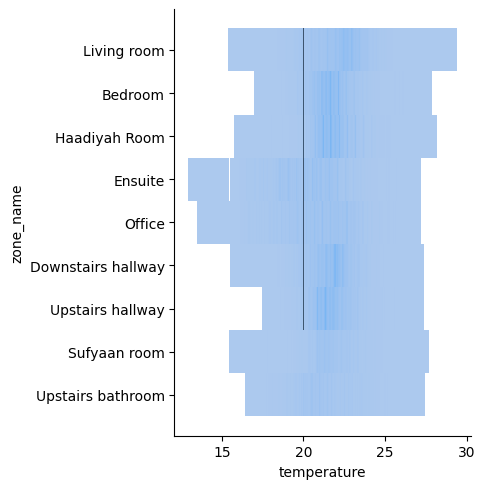

In [4]:
sns.displot(data=postprocessed, x='temperature', y='zone_name')

---